In [37]:
import pandas as pd
import scipy.stats as spst
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

data = pd.read_csv('./train.csv')

In [38]:
# 아무리 생각해도, 이름이 아니라, 길이이기 때문에, 특정칼럼을 선택해서 하기에는 
# 많은 데이터가 삭제될 것이라고 판단했습니다.
# 따라서, 전체데이터에서 중복되는 데이터를 지우기로 생각했습니다.
data.drop_duplicates(subset=None, keep='first', inplace=True)

### 단변량 분석

#### 수치형변수 (url에 관하여)
- url_len : URL 길이
- url_num_hypens_dom : URL내 '-'(하이픈) 개수
- url_path_len : URL의 경로 길이
- url_domain_len : URL의 도메인 길이
- url_host_name : URL의 hostname 길이
- url_num_dots : URL내 '.'(닷) 개수
- url_num_underscores : URL내 '_'(언더바) 개수
- url_query_len : URL쿼리 길이
- url_num_query_para : URL쿼리의 파라미터 개수
- url_entropy : URL 복잡도

----

- html_num_tags('iframe') : HTML내 'iframe' 태그 개수
- html_num_tags('script') : HTML내 'script' 태그 개수
- html_num_tags('embed') : HTML내 'embed' 태그 개수
- html_num_tags('object') : HTML내 'object' 태그 개수
- html_num_tags('div') : HTML내 'div' 태그 개수
- html_num_tags('head') : HTML내 'head' 태그 개수
- html_num_tags('body') : HTML내 'body' 태그 개수
- html_num_tags('form') : HTML내 'form' 태그 개수
- html_num_tags('a') : HTML내 'a' 태그 개수
- html_num_tags('applet') : HTML내 'applet' 태그 개수

In [39]:
def eda_num(df, var, bins=20):
        display(df[[var]].describe().T)
        plt.figure(figsize = (6,8))
        plt.subplot(2,1,1)
        sns.histplot(df[var], bins = bins, kde=True)

        plt.subplot(2,1,2)
        sns.boxplot(df[var])

        plt.tight_layout()
        plt.show()

#### url_len : URL 길이

,count,mean,std,min,25%,50%,75%,max
url_len,3233.0,56.106093,86.544916,6.0,24.0,36.0,57.0,1837.0


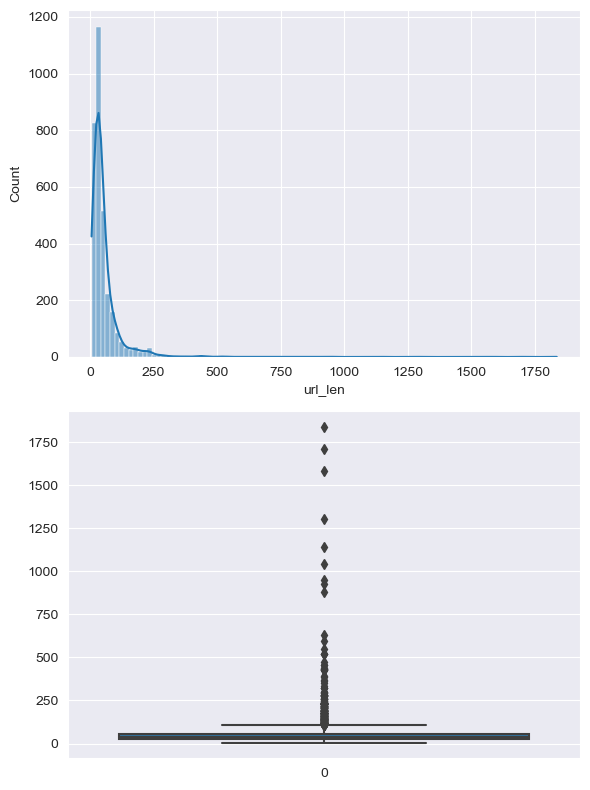

In [40]:
eda_num(data, 'url_len', bins=100)

In [41]:
data = data[data['url_len'] <= 100]

,count,mean,std,min,25%,50%,75%,max
url_len,2896.0,38.07424,19.796521,6.0,23.0,34.0,47.0,100.0


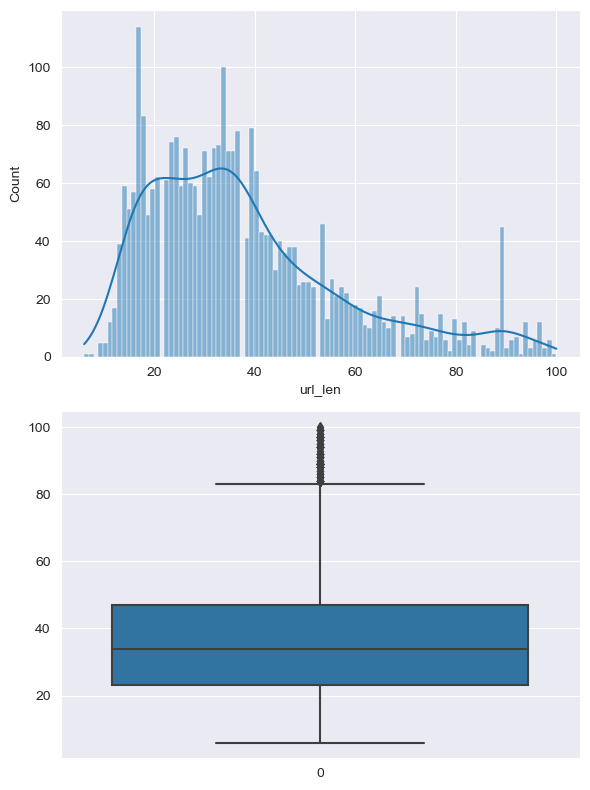

In [42]:
eda_num(data, 'url_len', bins=100)

- 20~40길이의 데이터가 제일 많다.

#### url_num_hypens_dom : URL내 '-'(하이픈) 개수

In [47]:
data = data[data['url_num_hyphens_dom'] <= 4]

,count,mean,std,min,25%,50%,75%,max
url_num_hyphens_dom,2889.0,0.428868,0.805459,0.0,0.0,0.0,1.0,4.0


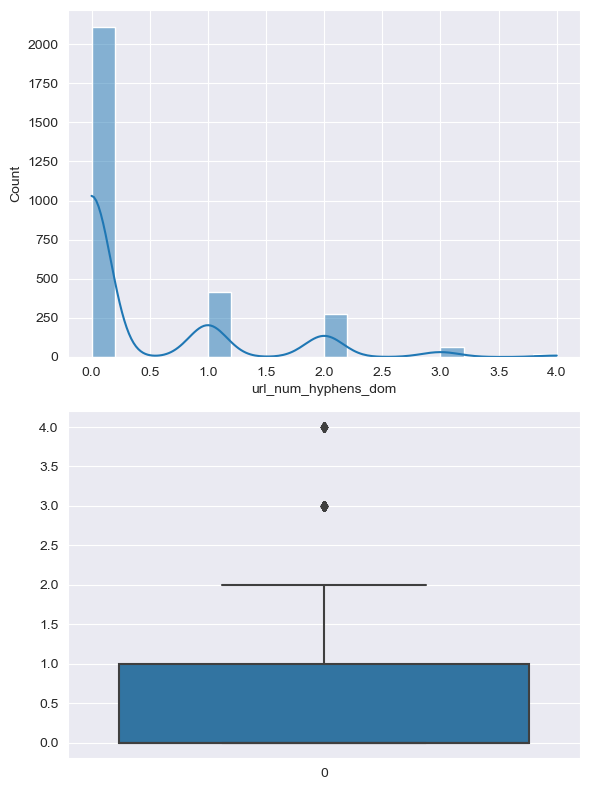

In [48]:
eda_num(data, 'url_num_hyphens_dom')

- url_num_hyphens_dom은 그다지 좋은 인자는 아닌 듯하다. drop하겠다.

#### url_path_len : URL의 경로 길이

,count,mean,std,min,25%,50%,75%,max
url_path_len,2888.0,16.350416,18.018977,0.0,1.0,10.0,24.0,86.0


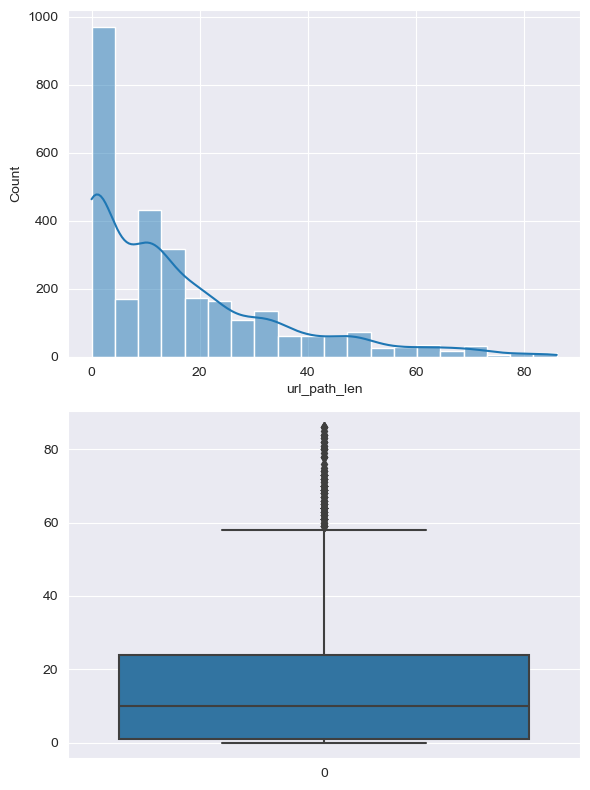

In [49]:
eda_num(data, 'url_path_len')

- url의 경로길이가 0인 인자가 상당히 많다.
- url의 경로길이란 "/view나 write/"와 같이 url에 들어가 특정작업을 할 때 붙는 것을 의미한다.
- 아마, url의 경로길이는 url의 도메인 주소와 상당히 관련이 있을 것이다.(상관관계 분석이 필요할 듯 싶다.)
- 만약에, 상관관계 분석을 통해, 깊은 상관관계를 보인다면, 제거해주는 것이 맞을 듯하다.

#### url_domain_len : URL의 도메인 길이

,count,mean,std,min,25%,50%,75%,max
url_domain_len,2888.0,20.437327,8.59017,4.0,15.0,18.0,24.0,74.0


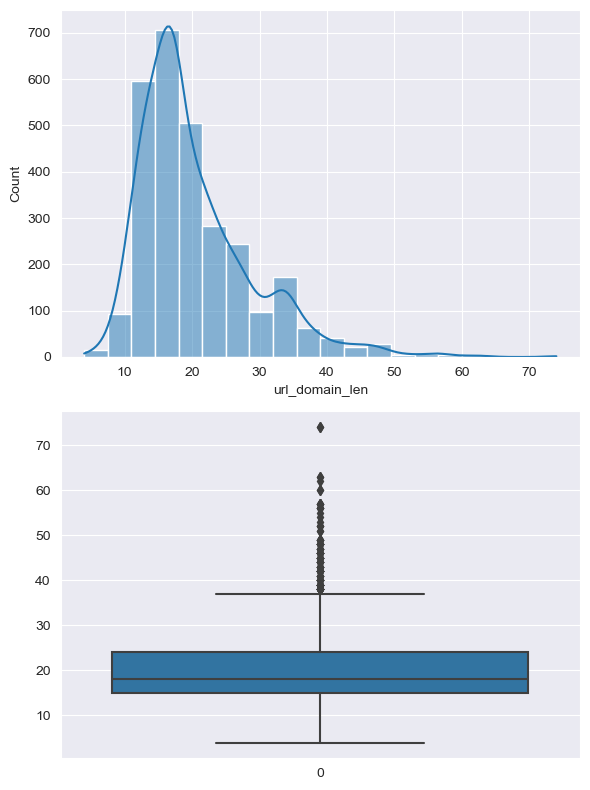

In [50]:
eda_num(data, 'url_domain_len')

In [51]:
# url_domain이 50이상의 데이터는 이상치라 판단되어 삭제.
data = data[data['url_domain_len'] <= 50]

- 15에서 18정도의 길이를 가진 도메인 이름이 상당수 많이 포진되어 있음을 알 수 있다.

#### url_host_name_len : URL의 hostname 길이

,count,mean,std,min,25%,50%,75%,max
url_hostname_len,2865.0,20.075742,7.96445,4.0,14.0,18.0,24.0,49.0


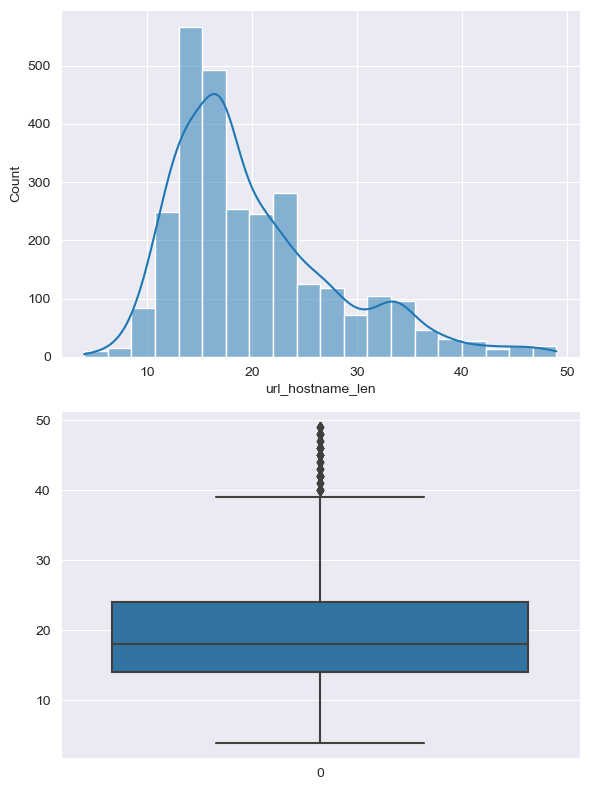

In [56]:
eda_num(data, 'url_hostname_len')

- 14에서 18사이의 hostname 길이를 가진 url이 상당히 많이 포진되어있음을 알 수 있다.

#### url_num_dots : URL내 '.'(닷) 개수

,count,mean,std,min,25%,50%,75%,max
url_num_dots,2865.0,2.34904,1.193113,1.0,2.0,2.0,3.0,16.0


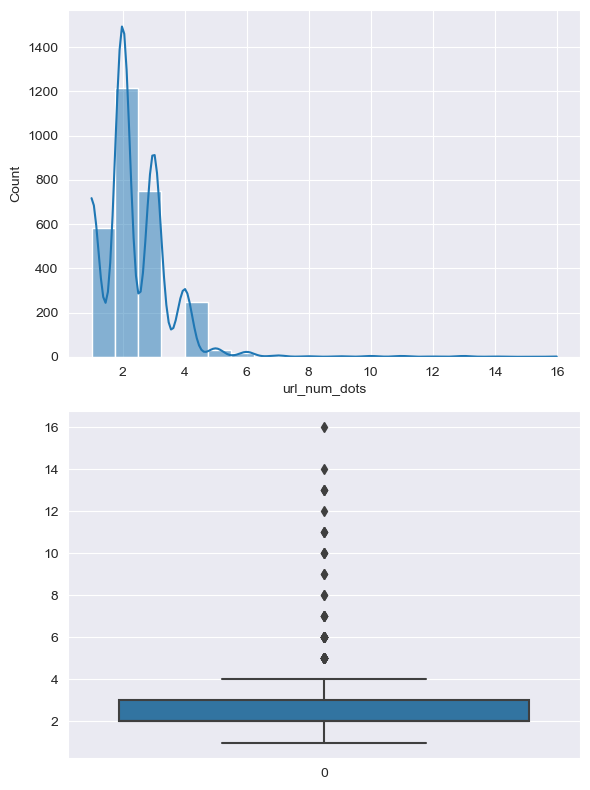

In [57]:
eda_num(data, 'url_num_dots')

- dot 갯수 2개가 50%이상을 차지할 정도로 가장 많다.
- 대략 4이상의 데이터는 이상치라 판단되어 제거하는 과정을 거치겠다.

In [58]:
data = data[data['url_num_dots'] <= 4]

#### url_num_underscores : URL내 '_'(언더바) 개수

,count,mean,std,min,25%,50%,75%,max
url_num_underscores,2795.0,0.128086,0.468838,0.0,0.0,0.0,0.0,6.0


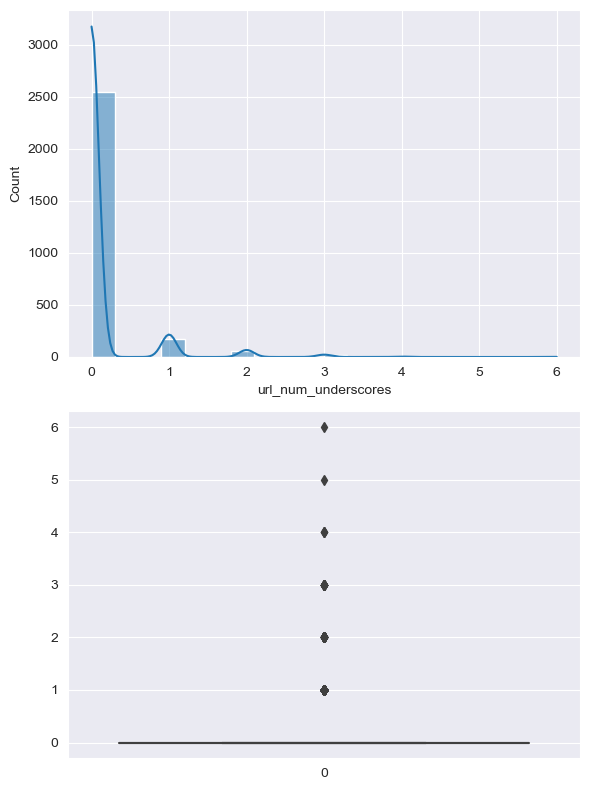

In [59]:
eda_num(data, 'url_num_underscores')

- 이 데이터는 필요없는 데이터다. 0인 데이터가 상당히 많고, 이상치도 무척 많다.
- drop하는 것이 좋겠다.

In [60]:
data.drop('url_num_underscores', axis=1, inplace=True)

C:\Users\minsu\AppData\Local\Temp\ipykernel_8408\866456249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('url_num_underscores', axis=1, inplace=True)


#### url_query_len : URL쿼리 길이

,count,mean,std,min,25%,50%,75%,max
url_query_len,2795.0,1.167442,6.704725,0.0,0.0,0.0,0.0,71.0


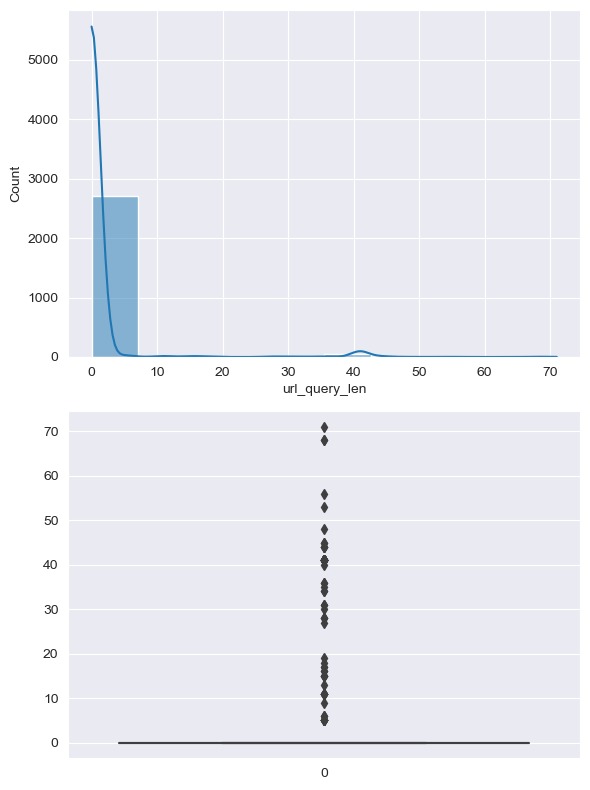

In [64]:
eda_num(data, 'url_query_len', bins=10)

- 이 데이터도 마찬가지이다. bins를 10으로 보나 100으로 보나 0인 데이터가 훨씬 많으며,
- 이상치 데이터가 무척 많다. -> drop하는 것이 좋겠다.

In [65]:
data.drop('url_query_len', axis=1, inplace=True)

C:\Users\minsu\AppData\Local\Temp\ipykernel_8408\1149255217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('url_query_len', axis=1, inplace=True)


#### url_num_query_para : URL쿼리의 파라미터 개수

,count,mean,std,min,25%,50%,75%,max
url_num_query_para,2795.0,0.031843,0.196758,0.0,0.0,0.0,0.0,3.0


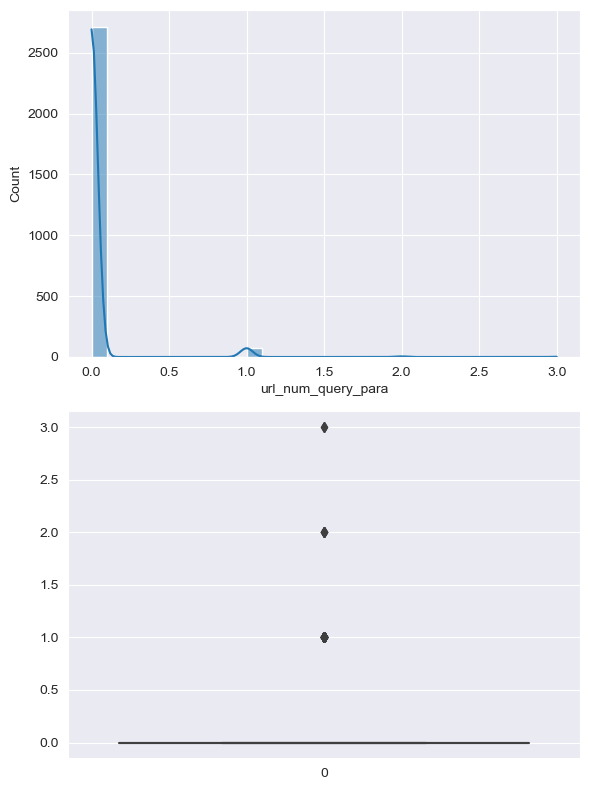

In [66]:
eda_num(data, 'url_num_query_para', bins=30)

- 마찬가지로 제거한다.

In [67]:
data.drop('url_num_query_para', axis=1, inplace=True)

C:\Users\minsu\AppData\Local\Temp\ipykernel_8408\2422526719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('url_num_query_para', axis=1, inplace=True)


#### url_entropy : URL 복잡도

,count,mean,std,min,25%,50%,75%,max
url_entropy,2795.0,4.175612,0.341596,3.077324,3.970176,4.163856,4.366422,5.486887


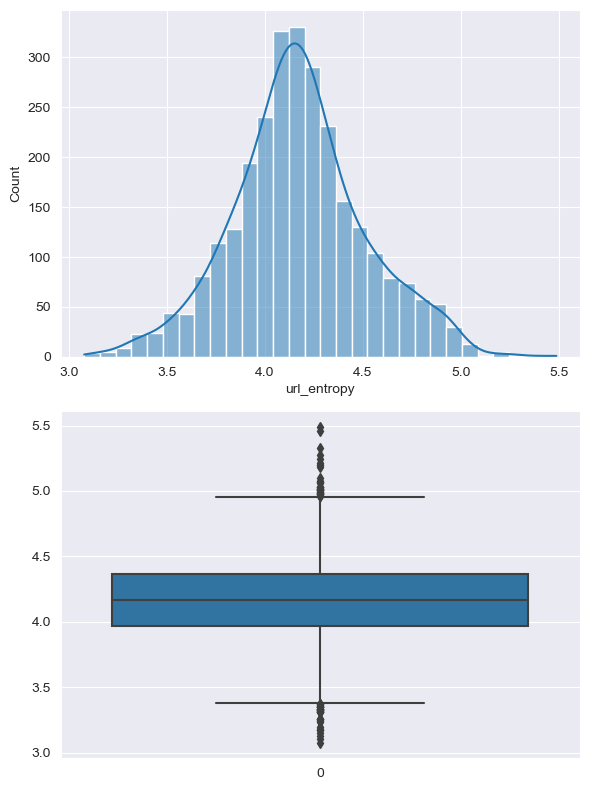

In [68]:
eda_num(data, 'url_entropy', bins=30)

- url복잡도는 꽤 중요한 변수인듯 하다. 4~4.3정도의 값을 가진 url복잡도가 상당히 많이 포진되어 있음을 알 수 있으며, 정규성을 또한 만족한다.

#### 수치형 변수(html에 관하여)

In [ ]:
# 이름이 너무 길다. 칼럼명을 바꾸겠다.
data.rename(columns= {
        'html_num_tags(\'object\')'
})

#### html_num_tags('iframe') : HTML내 'iframe' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('iframe'),2795.0,0.221825,0.938417,0.0,0.0,0.0,0.0,26.0


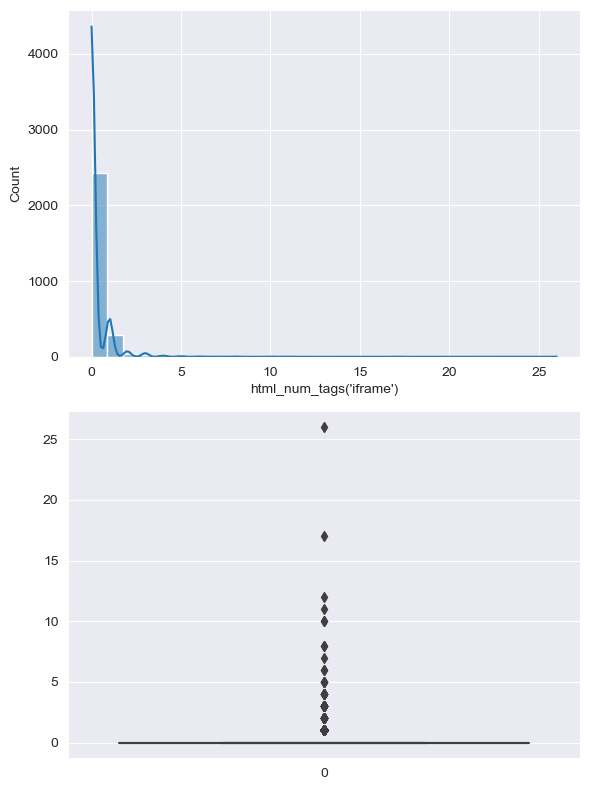

In [70]:
eda_num(data, 'html_num_tags(\'iframe\')', bins=30)

- drop한다.

In [71]:
data.drop('html_num_tags(\'iframe\')', axis=1, inplace=True)

C:\Users\minsu\AppData\Local\Temp\ipykernel_8408\4205119271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('html_num_tags(\'iframe\')', axis=1, inplace=True)


#### html_num_tags('script') : HTML내 'script' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('script'),2795.0,9.118068,13.307377,0.0,2.0,4.0,13.0,267.0


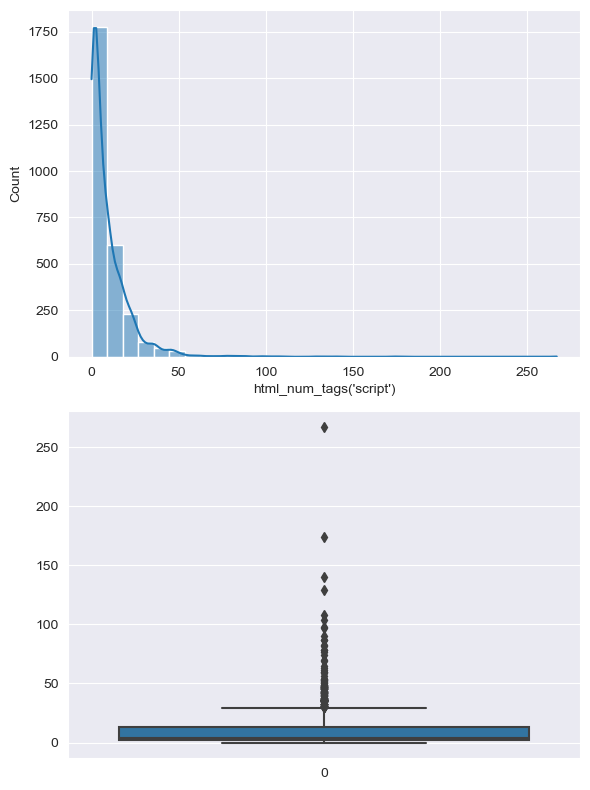

In [72]:
eda_num(data, 'html_num_tags(\'script\')', bins=30)

- 0인 데이터가 훨씬 많다. 13인 값까지만 남겨두고 삭제하도록 하겠다.

In [73]:
data = data[data['html_num_tags(\'script\')'] <= 13]

#### html_num_tags('embed') : HTML내 'embed' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('embed'),2150.0,0.01907,0.146652,0.0,0.0,0.0,0.0,3.0


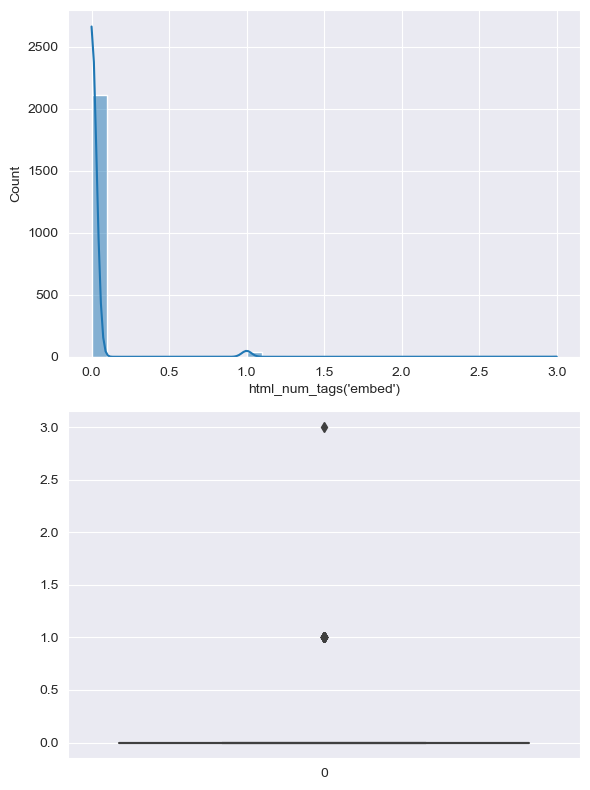

In [74]:
eda_num(data, 'html_num_tags(\'embed\')', bins=30)

- 가차없이 삭제한다.

In [75]:
data.drop('html_num_tags(\'embed\')', axis=1, inplace=True)

#### html_num_tags('object') : HTML내 'object' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('object'),2150.0,0.034419,0.280806,0.0,0.0,0.0,0.0,8.0


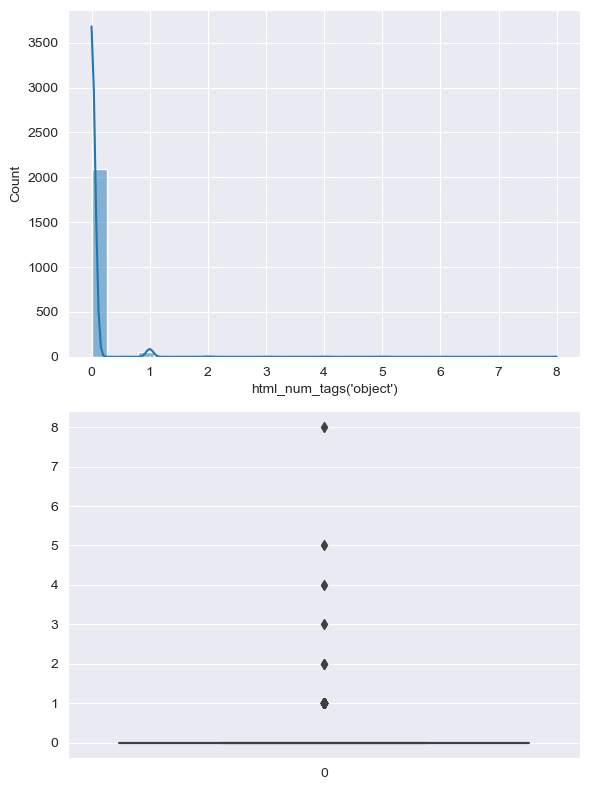

In [76]:
eda_num(data, 'html_num_tags(\'object\')', bins=30)

- 가차없이 삭제한다.

In [77]:
data.drop('html_num_tags(\'object\')', axis=1, inplace=True)

#### html_num_tags('div') : HTML내 'div' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('div'),2150.0,53.531163,179.974102,0.0,4.0,26.0,43.75,5511.0


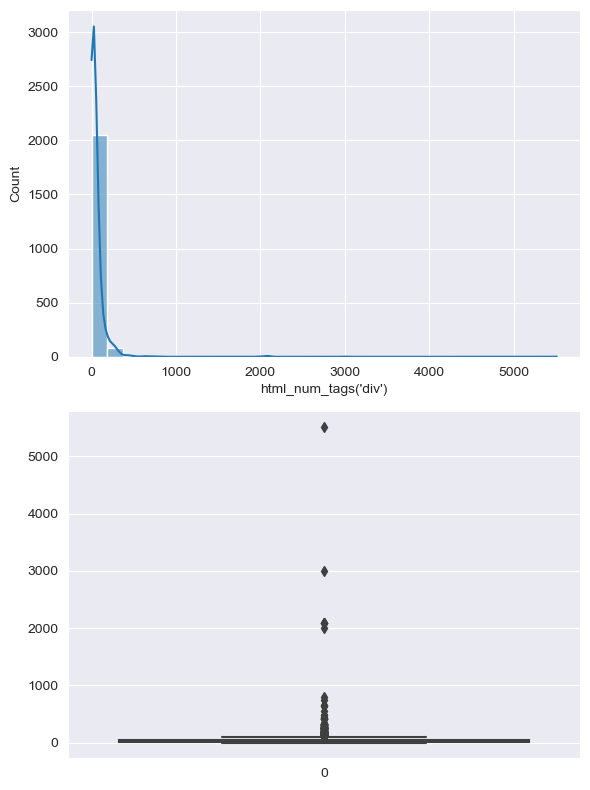

In [78]:
eda_num(data, 'html_num_tags(\'div\')', bins=30)

- 75%의 값이 43.75개로 집계되었다.
- 이를 통해, 43.75개의 데이터까지만 div태그 데이터로 받고, 나머지는 버린다.

In [79]:
data = data[data['html_num_tags(\'div\')'] <= 43.75]

#### html_num_tags('head') : HTML내 'head' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('head'),1612.0,0.998139,0.138706,0.0,1.0,1.0,1.0,2.0


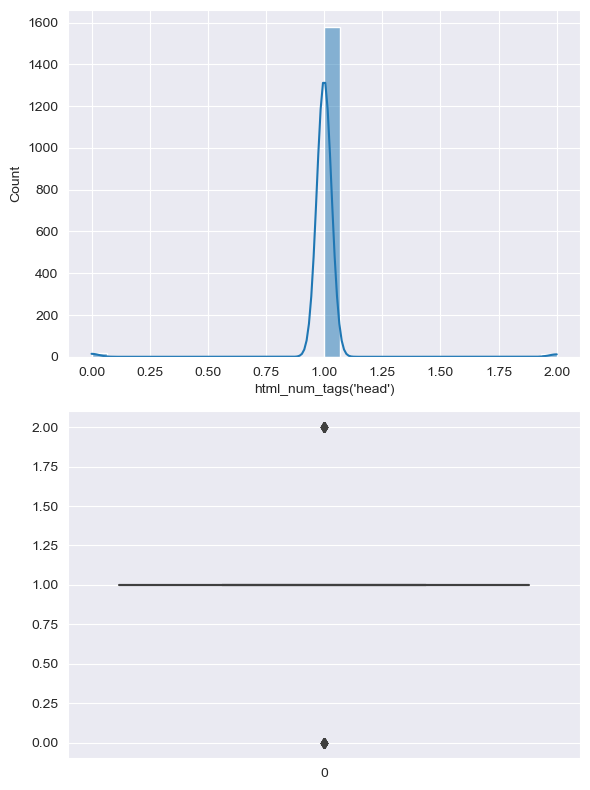

In [80]:
eda_num(data, 'html_num_tags(\'head\')', bins=30)

- 이 데이터는 1 데이터가 거의 전부이다. 그 말의 즉슨, 이 데이터는 필요없는 변수라는 뜻이다.
- 따라서 drop하겠다.

In [81]:
data.drop('html_num_tags(\'head\')', axis=1, inplace=True)

#### html_num_tags('body') : HTML내 'body' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('body'),1612.0,1.004963,0.230994,0.0,1.0,1.0,1.0,3.0


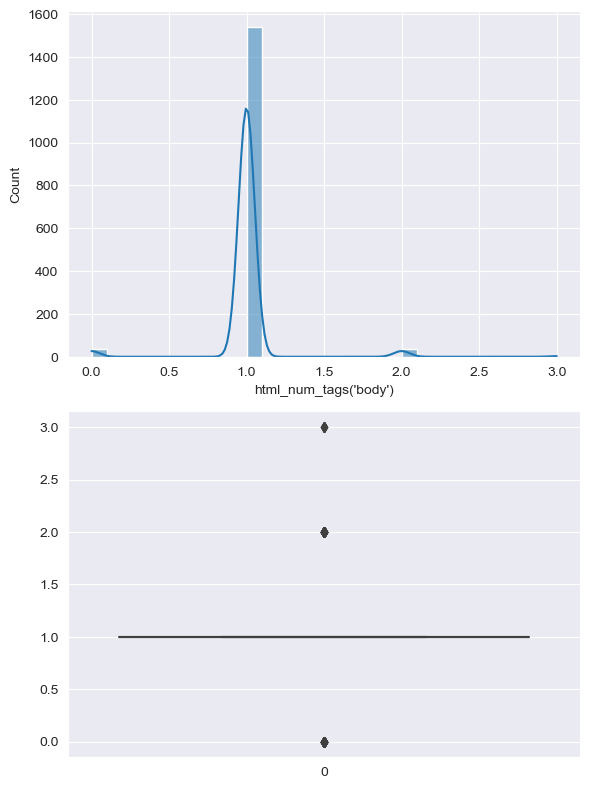

In [82]:
eda_num(data, 'html_num_tags(\'body\')', bins=30)

- 거의 0~1 값이 분포되어있지만, 이 변수도 의미있는 변수로 보이지 않는다. drop하겠다.

In [83]:
data.drop('html_num_tags(\'body\')', axis=1, inplace=True)

#### html_num_tags('form') : HTML내 'form' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('form'),1612.0,0.639578,0.683945,0.0,0.0,1.0,1.0,11.0


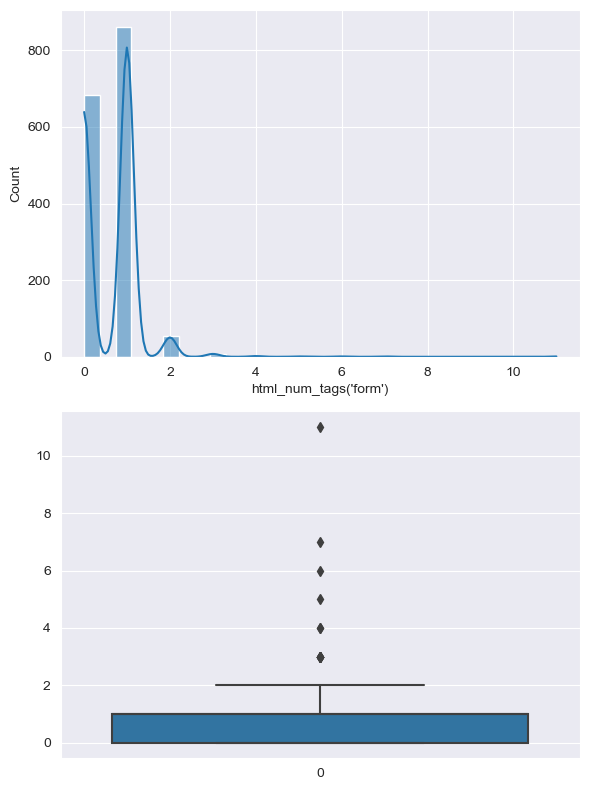

In [84]:
eda_num(data, 'html_num_tags(\'form\')', bins=30)

- 태그의 갯수가 0인 것과 1인 것이 골고루 분포되어있는 것을 볼 수 있었다. 태그의 갯수가 1인 것까지만 남기고 나머지는 제거하는 것이 좋겠다.

In [85]:
data = data[data['html_num_tags(\'form\')'] <= 1]

#### html_num_tags('a') : HTML내 'a' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('a'),1544.0,18.515544,59.240569,0.0,0.0,4.0,16.0,1236.0


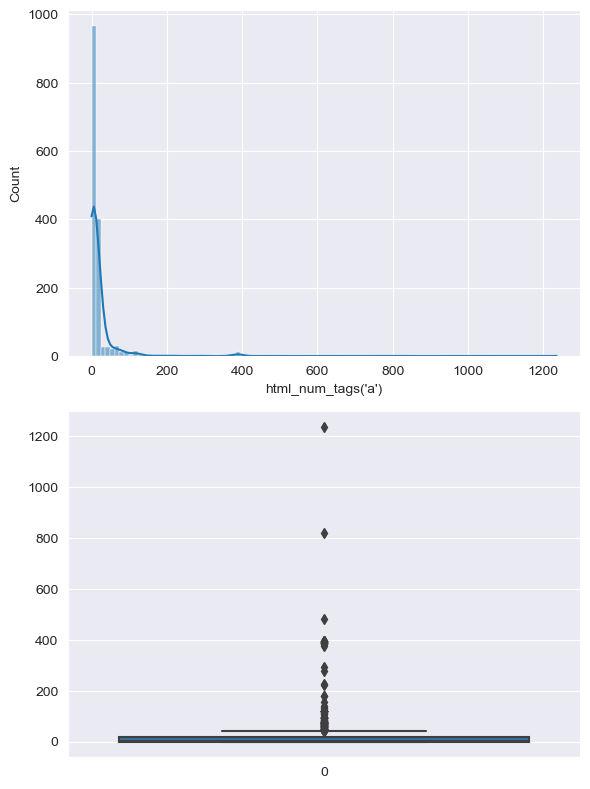

In [87]:
eda_num(data, 'html_num_tags(\'a\')', bins=100)

- 75%의 비중에서 16인 값을 가진다. 16인 값까지만 취하고, 나머지는 제거하도록 하겠다.

In [88]:
data = data[data['html_num_tags(\'a\')'] <= 16]

#### html_num_tags('applet') : HTML내 'applet' 태그 개수

,count,mean,std,min,25%,50%,75%,max
html_num_tags('applet'),1239.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


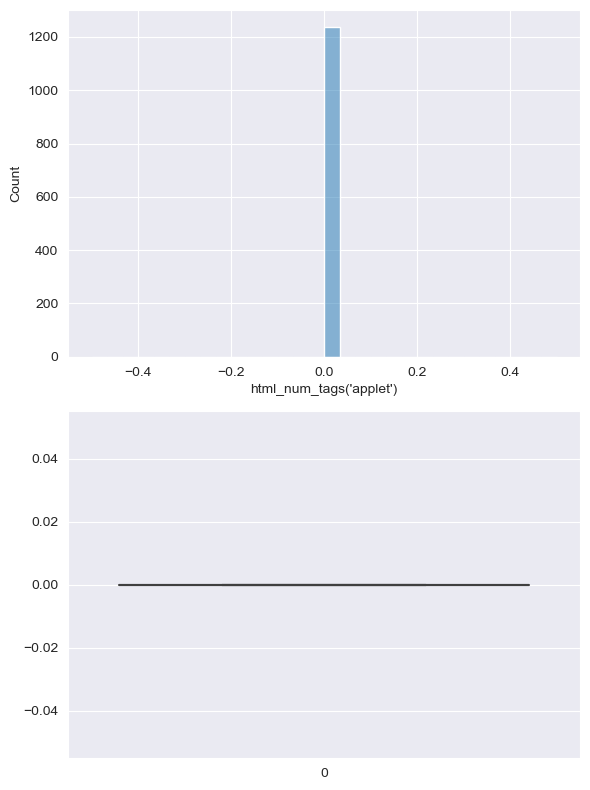

In [89]:
eda_num(data, 'html_num_tags(\'applet\')', bins=30)

- 이 데이터는 활용하기에 마땅하지 않다. 전부 0인 데이터다. drop하겠다.

In [90]:
data.drop('html_num_tags(\'applet\')', axis=1, inplace=True)

#### 사용할 수치형 변수 정리
url과 관련된 수치형 변수
- url_len : URL 길이
- url_num_hyphens_dom : URL내 '-'(하이픈) 개수
- url_path_len : URL의 경로 길이
- url_domain_len : URL의 도메인 길이
- url_hostname_len : URL의 hostname 길이
- url_num_dots : URL내 '.'(닷) 개수
- url_entropy : URL 복잡도

-----------------------------------
html 태그와 관련된 수치형 변수
- html_num_tags('script') : HTML내 'script' 태그 개수
- html_num_tags('div') : HTML내 'div' 태그 개수
- html_num_tags('form') : HTML내 'form' 태그 개수
- html_num_tags('a') : HTML내 'a' 태그 개수

#### 상관관계 분석

In [94]:
data_num = data.copy()

In [96]:
data_num = data_num.loc[:, ['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len', 'url_hostname_len', 'url_num_dots', 'url_entropy']]

In [97]:
plt.figure(figsize=(20, 8))
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='whitegrid')

<Figure size 2000x800 with 0 Axes>

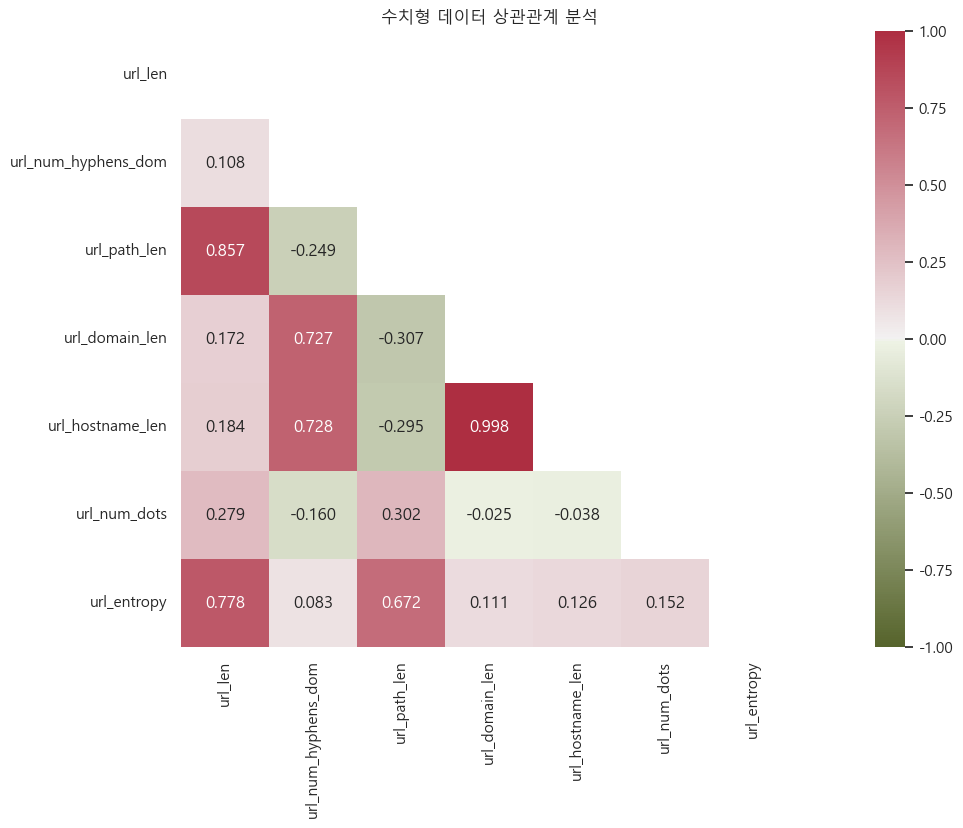

In [99]:
import numpy as np


df = data_num.corr()
plt.figure(figsize = (20, 8))
mask = np.triu(np.ones_like(df, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
#cmap = sns.dark_palette("#b285bc", as_cmap=True)
sns.heatmap(df,
            annot = True,
            mask = mask,
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = cmap,       # 칼라맵
            vmin = -1, vmax = 1,
            square=True)     # 값의 최소, 최대값값
plt.title("수치형 데이터 상관관계 분석")
plt.show()

- url_path_len과 url_len과의 상관관계는 0.857로 꽤 높은 수치를 가진다.
- url_hostname_len과 url_domain_len의 상관관계는 0.998로 매우 높은 수치를 가진다.
- 따라서, 둘 중 하나는 제거할 필요가 있겠다라고 판단.

### 범주형 변수

- url_ip_present : URL내 IP표시 여부 # 0과 1로 구성되어있음.
- url_chinese_present : URL내 중국어 표기 여부
- url_port : URL내 포트 표기 여부
- label : 우리가 예측해야 할 target

#### url_ip_present

In [105]:
def eda_category(df, var):
        display(df[[var]].value_counts().T)
        plt.figure(figsize = (5,5))
        plt.subplot(1,2,1)
        sns.countplot(df[var])
        plt.grid()

        plt.subplot(1,2,2)
        temp = df[var].value_counts()
        plt.pie(temp.values, labels=temp.index, autopct='%.2f%%', startangle=90)

        plt.tight_layout()
        plt.show()

url_ip_present
0.0               1110
1.0                129
dtype: int64

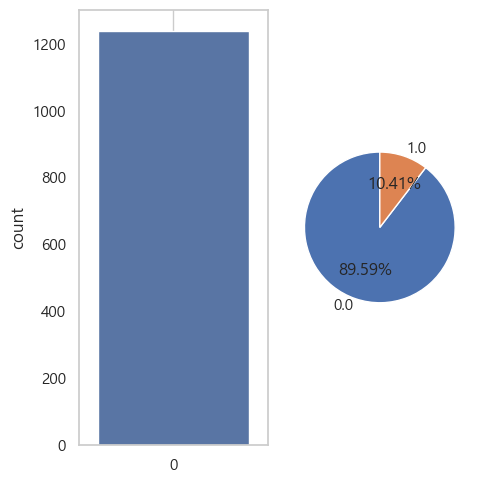

In [106]:
eda_category(data, 'url_ip_present')

#### url_chinese_present

url_chinese_present
0.0                    1239
dtype: int64

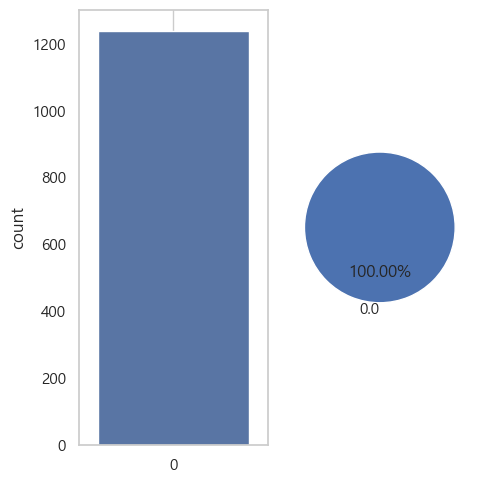

In [107]:
eda_category(data, 'url_chinese_present')

- 전체 데이터 전부가 chinese가 없는 값이 나오기 때문에, drop하겠다.

In [108]:
data.drop('url_chinese_present', axis=1, inplace=True)

#### url_port

url_port
0.0         1238
1.0            1
dtype: int64

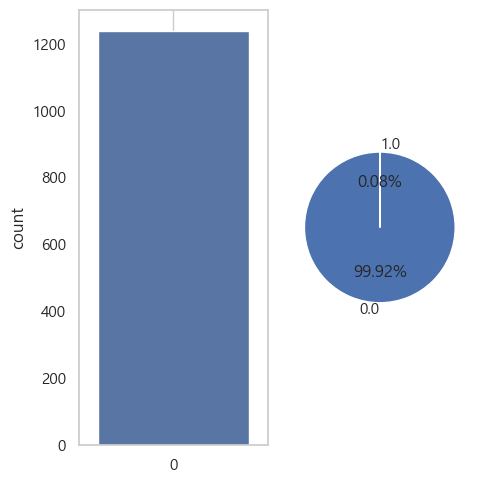

In [109]:
eda_category(data, 'url_port')

- 이 데이터도 유의미한 값으로 보이지 않는다. 전체 데이터 중 단 1건만, port가 True라고 나온다.
- drop하는 것이 좋겠다.

In [110]:
data.drop('url_port', axis=1, inplace=True)

#### label

<AxesSubplot: xlabel='label', ylabel='count'>

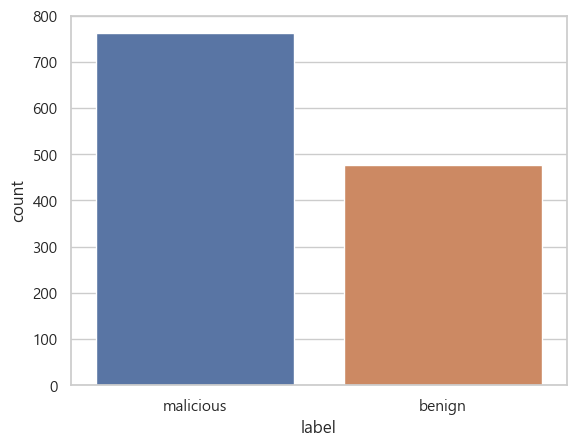

In [112]:
sns.countplot(x=data['label'])

- 우리가 예측할 값이 골고루 분포되어있음을 알 수 있다. 특이점은 malicious(악성) 사이트가 훨씬 많다는 것이다.

In [115]:
data.to_csv('./eda01_complete.csv', index=False)